# Zyfra 

* Prepare um protótipo de um modelo de aprendizado de máquina para o Zyfra. A empresa desenvolve soluções de eficiência para a indústria pesada.
* O modelo deve prever a quantidade de ouro puro extraído do minério de ouro. Você tem os dados sobre a extração e a purificação.
* O modelo ajudará a otimizar a produção e eliminar parâmetros não rentáveis.

**Descrição de dados**

*Processo tecnológico*
* Rougher feed — matéria-prima
* Rougher additions (ou aditivos reagentes) — reagentes de flotação: Xantato, Sulfeto, Depressor
* Xanthate — promotor ou ativador da flotação
* Sulphate — sulfeto de sódio para este processo específico
* Depressant — silicato de sódio
* Rougher process — flotação
* Rougher tails — resíduos do produto
* Float banks — unidade de flotação
* Cleaner process — purificação
* Rougher Au — concentrado de ouro bruto
* Final Au — concentrado de ouro final

*Parâmetros das etapas*
* air amount — volume of air — volume de ar
* fluid levels
* feed size — tamanho de partícula alimentada
* feed rate

**Nomeação de características**

Veja como você nomeia as características:
[stage].[parameter_type].[parameter_name]

Exemplo: rougher.input.feed_ag


Valores possíveis para [stage]:

* rougher — (Minério bruto) flotação
* primary_cleaner — purificação primária
* secondary_cleaner — purificação secundária
* final — características finais

Valores possíveis para [parameter_type]:

* input — parâmetros de matéria-prima
* output — parâmetros do produto
* state — parâmetros que caracterizam o estado atual do processamento
* calculation — características de cálculo

## Preparação dos Dados

### Bibliotecas & Vizualização

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy.random import RandomState
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')
display(df_train,df_test,df_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


### Verificação

*  Verifique se a quantidade retirada foi calculada corretamente. Usando o conjunto de treinamento, calcule a quantidade retirada para a característica rougher.output.recovery. Encontre o EAM entre seus cálculos e os valores das características. Forneça resultados.

In [3]:
def ret (df,c,f,t):
    retirada = ((df[c]*df[f]-df[c]*df[t])/(df[f]*df[c]-df[f]*df[t]))*100
    return retirada

In [4]:
display(df_train[['rougher.output.recovery']])
reti = ret(df_train.dropna(subset=['rougher.output.recovery']),'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
reti

,rougher.output.recovery
0,87.107763
1,86.843261
2,86.842308
3,87.226430
4,86.688794
...,...
16855,89.574376
16856,87.724007
16857,88.890579
16858,89.858126


0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

In [5]:
mean_absolute_error(df_train['rougher.output.recovery'].dropna().to_list(), reti)

1.1067401243687207e-14

* A diferença entre os valores é praticamente insignificante, a nova coluna foi gerada da melhor forma.

### Características não Disponíveis

* Analise as características não disponíveis no conjunto de teste. Quais são esses parâmetros? Qual é o tipo deles?

In [6]:
display(df_train.shape, df_test.shape, df_full.shape)

16860+5856

(16860, 87)

(5856, 53)

(22716, 87)

22716

In [7]:
l_cols = []

for col in df_train.columns:
    if col not in df_test.columns:
        l_cols.append(col)
l_cols

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [8]:
l_cols_in = []

for col in df_train.columns:
    if col in df_test.columns:
        l_cols_in.append(col)
l_cols_in

['date',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

* Existem colunas inexistentes no data frame de teste que existem no train e no full. A primeira lista é sobre as colunas que não estão no df_test e a segunda é sobre as que estão. Podemos perceber que tem muitos output faltando no df_test que estão no df_train.

### Pré-processamento

* Removeremos essas colunas do conjunto de dados de treinamento que se diferem do conjunto de teste. Dito isso, há duas variáveis que não estão incluídas no conjunto de dados de teste e que deveriam estar, ou seja, as variáveis "final.output.recovery" e "rougher.output.recovery", que são os alvos de nossa investigação. Mesclaremos essas variáveis do DataFrame full no DataFrame test em "date" para que tenhamos nossos targets ao testar nossos modelos. 

In [9]:
test = pd.merge(df_test, df_full[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')


train = df_train.drop(columns=[x for x in df_train if x not in test], axis=1)

test = test.drop(columns=[x for x in test if x not in df_train], axis=1)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   final.output.recovery                       15339 non-null  float64
 2   primary_cleaner.input.sulfate               15553 non-null  float64
 3   primary_cleaner.input.depressant            15598 non-null  float64
 4   primary_cleaner.input.feed_size             16860 non-null  float64
 5   primary_cleaner.input.xanthate              15875 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      16820 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    16827 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      16820 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    16833 non-null  float64
 10  primary_cl

In [12]:
print(f"Duplicatas no dataframe train: {train.duplicated().sum()}")
print(f"Duplicatas no dataframe test: {test.duplicated().sum()}")

Duplicatas no dataframe train: 0
Duplicatas no dataframe test: 0


In [13]:
print(f"NaNs no train: {train.isnull().any(axis=1).sum()}")
print(f"NaNs no test: {test.isna().any(axis=1).sum()}")

NaNs no train: 4181
NaNs no test: 627


* Como há muitos NaNs nos DataFrames, não podemos simplesmente descartá-los. Por isso, preencheremos os NaNs usando o método k-Nearest Neighbor. Este método imputa valores ausentes em conjuntos de dados encontrando os vizinhos mais próximos usando uma matriz de distância euclidiana. Acreditamos que este método nos forneceria a estimativa mais exata de um valor NaNs considerando o dataframe em que estamos trabalhando

In [14]:
scaler = MinMaxScaler()


scale_columns = [x for x in train.columns if x  not in ['date', 'rougher.output.recovery', 'final.output.recovery']]
non_scale_columns = ['date', 'rougher.output.recovery', 'final.output.recovery']


train_scaled = pd.DataFrame(scaler.fit_transform(train[scale_columns].copy()), columns = scale_columns)
test_scaled = pd.DataFrame(scaler.transform(test[scale_columns].copy()), columns = scale_columns)

In [15]:
imputer = KNNImputer()


train_scaled = pd.concat([train[non_scale_columns]] + \
                              [pd.DataFrame(imputer.fit_transform(train_scaled), \
                               columns=train_scaled.columns)], axis = 1)

test_scaled = pd.concat([test[non_scale_columns]] + \
                             [pd.DataFrame(imputer.transform(test_scaled), \
                              columns=test_scaled.columns)], axis = 1)

In [16]:
print(f"NaNs no train_scaled: {train_scaled.isnull().any(axis=1).sum()}")
print(f"Porcentagem de NaNs em um ou mais targets no train_scaled: {round(100 * (train_scaled.isnull().any(axis=1).sum()) / len(train_scaled), 2)}\n")
print(f"NaNs no test_scaled: {test_scaled.isna().any(axis=1).sum()}")
print(f"Porcentagem de NaNs em um ou mais targets no test_scaled: {round(100 * (test_scaled.isnull().any(axis=1).sum()) / len(test_scaled), 2)}")

NaNs no train_scaled: 2711
Porcentagem de NaNs em um ou mais targets no train_scaled: 16.08

NaNs no test_scaled: 566
Porcentagem de NaNs em um ou mais targets no test_scaled: 9.67


In [17]:
train_scaled = train_scaled.dropna().reset_index(drop=True)
test_scaled = test_scaled.dropna().reset_index(drop=True)

In [18]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   rougher.output.recovery                     14149 non-null  float64
 2   final.output.recovery                       14149 non-null  float64
 3   primary_cleaner.input.sulfate               14149 non-null  float64
 4   primary_cleaner.input.depressant            14149 non-null  float64
 5   primary_cleaner.input.feed_size             14149 non-null  float64
 6   primary_cleaner.input.xanthate              14149 non-null  float64
 7   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64
 8   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64
 9   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64
 10  primary_cl

In [19]:
test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   rougher.output.recovery                     5290 non-null   float64
 2   final.output.recovery                       5290 non-null   float64
 3   primary_cleaner.input.sulfate               5290 non-null   float64
 4   primary_cleaner.input.depressant            5290 non-null   float64
 5   primary_cleaner.input.feed_size             5290 non-null   float64
 6   primary_cleaner.input.xanthate              5290 non-null   float64
 7   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 10  primary_clea

**CONCLUSÃO**

* Carregamos as bibliotecas, vizualizamos os dados. Fizemos o calculo da retirada com sucesso e o *EAM* foi pequeno. Preparamos os dados em relação a valores ausentes e colunas diferentes também.

## Análise de dados

### Observação

*  Observe como a concentração de metais (Au, Ag, Pb) muda dependendo do estágio de purificação.

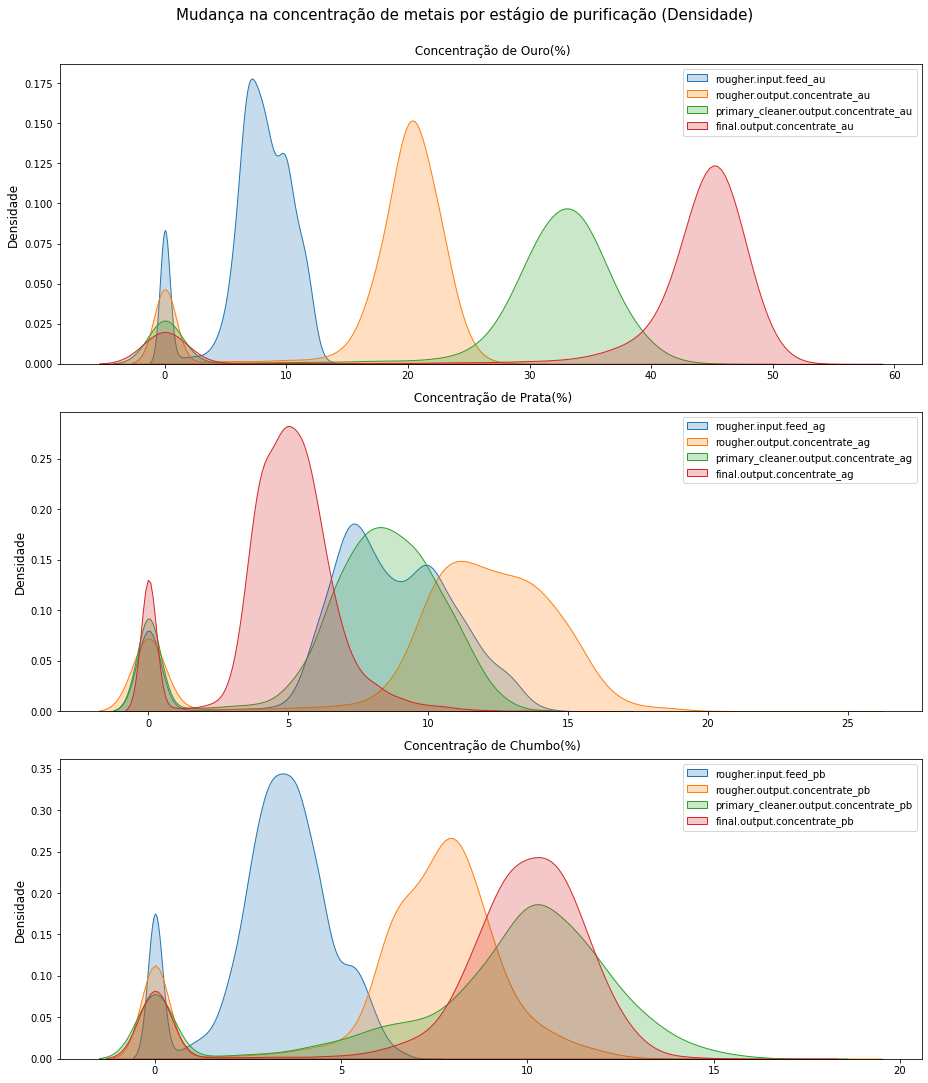

In [20]:
concen = ["rougher.input.feed", "rougher.output.concentrate", "primary_cleaner.output.concentrate", "final.output.concentrate"]

metals = {'_au' : 'Ouro', '_ag' : 'Prata', '_pb' : 'Chumbo'}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(13, 15), sharey=False)
fig.suptitle('Mudança na concentração de metais por estágio de purificação (Densidade)', fontsize=15, y=1)

for x in metals.keys():
    for c in concen:
        ax = list(metals.keys()).index(x)
        sns.kdeplot(df_full[(c+x)], ax=axes[ax], shade='fill', label=(c+x))
        axes[ax].legend()
        axes[ax].set_xlabel(' Concentração de '+metals[x]+'(%)', fontsize=12, labelpad = 10)
        axes[ax].xaxis.set_label_position('top')
        axes[ax].set_ylabel('Densidade', fontsize=12)

plt.tight_layout()
plt.show()

* Ouro: Em cada etapa do processo de purificação, a concentração de ouro aumenta. Isto é exatamente o que se pretende ver num projeto de extração de ouro.

* Prata: Curiosamente, após a flotação, a concentração de prata aumenta, mas depois diminui após cada processo. O resultado final é uma concentração de prata menor do que a concentração na mistura inicial do minério.

* Chumbo: Parece que a concentração de chumbo aumenta até ao processo de limpeza da segunda fase, onde permanece aproximadamente igual à concentração após o processo de limpeza primário.

Parece que existem valores atípicos nos dados relevantes. Para cada fase do processo, vemos que há lugares em que a concentração de cada metal é 0. Isto pode dever-se à falta do metal no minério inicial, ou a um problema com os dados.

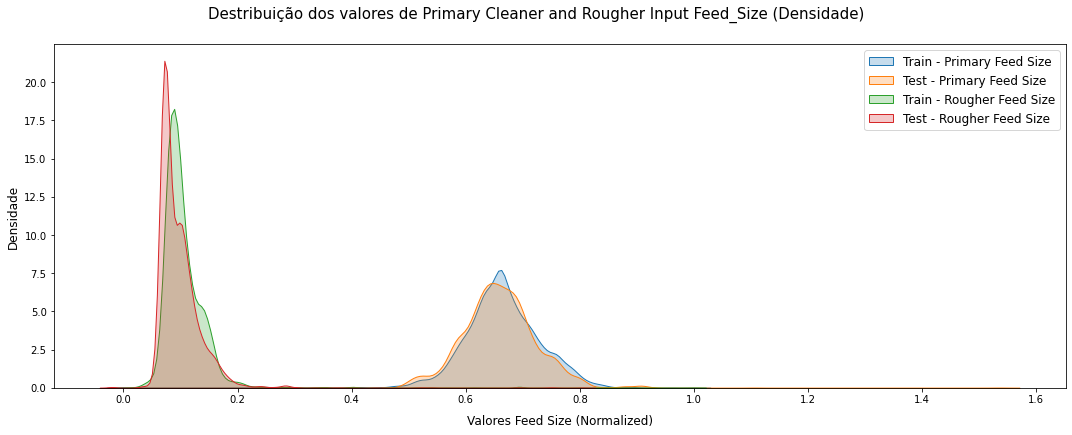

In [21]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Destribuição dos valores de Primary Cleaner and Rougher Input Feed_Size (Densidade)', fontsize=15, y=1)

sns.kdeplot(train_scaled['primary_cleaner.input.feed_size'], fill=True, label='Train - Primary Feed Size')
sns.kdeplot(test_scaled['primary_cleaner.input.feed_size'], fill=True, label='Test - Primary Feed Size')
sns.kdeplot(train_scaled['rougher.input.feed_size'], fill=True, label='Train - Rougher Feed Size')
sns.kdeplot(test_scaled['rougher.input.feed_size'], fill=True, label='Test - Rougher Feed Size')
plt.legend(fontsize=12)
plt.xlabel('Valores Feed Size (Normalized)', fontsize=12, labelpad = 10)
plt.ylabel('Densidade', fontsize=12)
    
plt.tight_layout()
plt.show()

* Como podemos ver no gráfico acima, as distribuições de valores para 'primary_cleaner.input.feed_size' e 'rougher.input.feed_size' são praticamente as mesmas para os conjuntos de dados de treinamento e teste. Isso é bom, pois distribuições muito diferentes das principais features entre os conjuntos de dados de treinamento e teste podem afetar negativamente o desempenho de um modelo.

* É importante notar aqui que os tamanhos de alimentação apresentados no gráfico não são os valores reais dos conjuntos de dados originais; em vez disso, são os valores à escala que obtivemos após normalizar os dados.

In [22]:
def metal_concen_sum(df, stage):
    metal_handles = list(metals.keys())
    total_concen = df[stage+metal_handles[0]] + df[stage+metal_handles[1]] + df[stage+metal_handles[2]]
    return total_concen

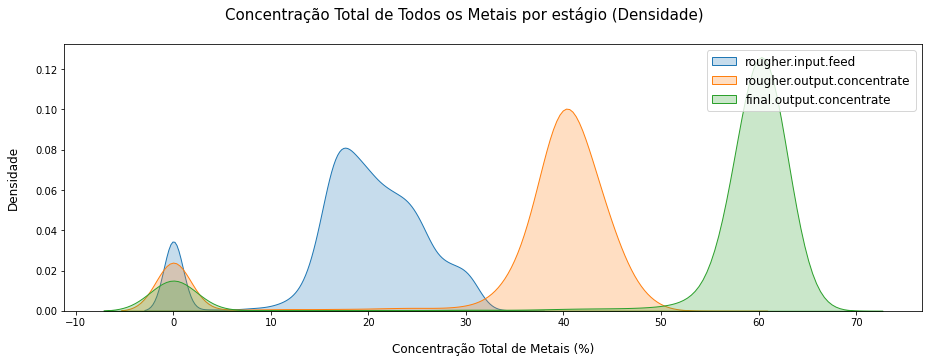

In [23]:
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Concentração Total de Todos os Metais por estágio (Densidade)', fontsize=15, y=1)

sns.kdeplot(metal_concen_sum(df_full, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(metal_concen_sum(df_full, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(metal_concen_sum(df_full, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Concentração Total de Metais (%)', fontsize=12, labelpad = 15)
plt.ylabel('Densidade', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

* O gráfico acima mostra a estimativa da densidade para a distribuição das concentrações totais de metais para cada fase do processo de purificação. Como podemos ver, a concentração total de todos os metais aumenta, na sua maioria, em cada fase do processo de purificação. No entanto, existem valores anormais claros, que são representados pelos valores agrupados em torno de 0. Para garantir que estes valores anormais não afetem negativamente os modelos que iremos treinar numa seção posterior, iremos remover os valores anormais dos nossos conjuntos de dados de treino e teste. Com base no gráfico, acreditamos que um bom valor de concentração de corte é 10 para cada estágio. Uma vez que os valores nos conjuntos de dados de treino e teste foram normalizados, não podemos simplesmente filtrar os conjuntos de dados somando os valores relevantes e selecionando apenas as linhas em que o valor é superior a 10. Em vez disso, filtraremos esses valores discrepantes do DataFrame full e, em seguida, removeremos essas linhas dos outros conjuntos de dados usando o indexador 'date'.

In [24]:
full_no_outliers = df_full.loc[(df_full[['rougher.input.feed_au', 'rougher.input.feed_pb', \
                                               'rougher.input.feed_ag']].sum(axis=1) > 10) \
                                  & (df_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', \
                                                 'rougher.output.concentrate_ag']].sum(axis=1) > 10) \
                                  & (df_full[['final.output.concentrate_au', 'final.output.concentrate_pb', \
                                                'final.output.concentrate_ag']].sum(axis=1) > 10)]

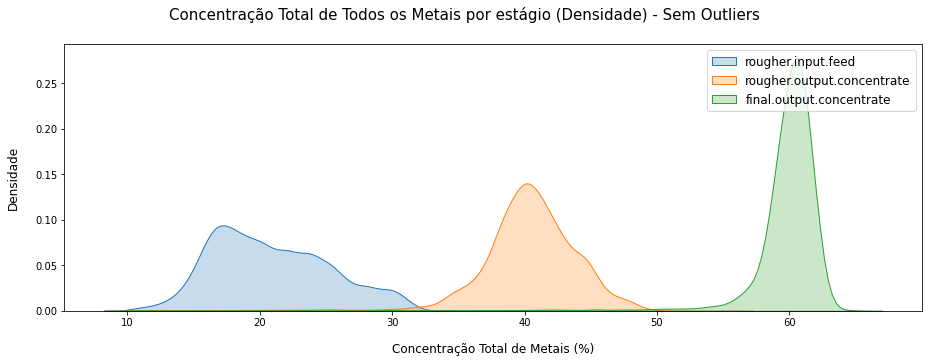

In [25]:
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Concentração Total de Todos os Metais por estágio (Densidade) - Sem Outliers', fontsize=15, y=1)

sns.kdeplot(metal_concen_sum(full_no_outliers, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(metal_concen_sum(full_no_outliers, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(metal_concen_sum(full_no_outliers, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Concentração Total de Metais (%)', fontsize=12, labelpad = 15)
plt.ylabel('Densidade', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

* Como podemos ver no gráfico acima, removemos com sucesso os outliers. Armazenamos o DataFrame filtrado full na variável full_no_outliers. Agora, vamos garantir que apenas as linhas listadas nesse DataFrame filtrado estejam presentes nos conjuntos de dados de treinamento e teste. Para o fazer, vamos remover qualquer linha dos conjuntos de dados de treino e de teste em que o valor 'date' não esteja presente em full_no_outliers.

### Removendo Outliars


In [26]:
total_before = [len(train_scaled), len(test_scaled)]


train_scaled = train_scaled.loc[train_scaled['date'].isin(full_no_outliers['date'])].reset_index(drop=True)
test_scaled = test_scaled.loc[test_scaled['date'].isin(full_no_outliers['date'])].reset_index(drop=True)


display(pd.DataFrame([[total_before[0], len(train_scaled), round((100 - (len(train_scaled) / total_before[0]) * 100), 2)], \
                      [total_before[1], len(test_scaled), round((100 - (len(test_scaled) / total_before[1]) * 100), 2)]], \
                    columns = ['Inicial', 'Nova', 'Diferença (%)'], index=['Train', 'Test']))

,Inicial,Nova,Diferença (%)
Train,14149,13650,3.53
Test,5290,5133,2.97


**CONCLUSÃO**

Conclusão da análise de dados
Analisámos os nossos dados utilizando os conjuntos de dados de treino, teste e full. O objetivo geral desta análise era determinar se existiam outliers que pudessem ter um impacto negativo nos nossos modelos posteriores; além disso, queríamos determinar se a distribuição dos valores de rougher.feed_size era semelhante para os conjuntos de dados de treino e teste, uma vez que distribuições muito diferentes também poderiam afetar negativamente os nossos modelos.

Com base em nossas análises, descobrimos que as distribuições dos valores de rougher.feed_size são semelhantes para os conjuntos de dados de treinamento e teste. Verificámos também que existem valores anormais relativamente à concentração de metais em diferentes fases do processo de purificação. Mais notavelmente, descobrimos que, ao somar a concentração de todos os metais nas principais etapas do processo de purificação, há muitos valores que parecem ser 0, ou aproximadamente 0. Com base em nosso gráfico, podemos ver que esses são claramente outliers.


Para remover os valores atípicos dos conjuntos de dados de treino e de teste, filtramos os valores atípicos do DataFrame full e guardamos os resultados numa nova variável. Em seguida, utilizamos a função .isin() para garantir que apenas os pontos de dados listados no conjunto de dados sem anomalias estão presentes nos conjuntos de dados de treino e de teste. Foi possível utilizar este método porque os pontos de dados são indexados por valores de 'data'; como tal, foi possível verificar se os valores de 'data' nos conjuntos de dados de treino e de teste estão no conjunto de dados sem outliers e eliminar os pontos de dados que não cumprem esta condição.


## Construção do Modelo


In [27]:
def smape2(y_true, y_pred):
    smape = np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2)) * 100 
    return smape

def f_smape(y_true, y_pred):
    predicted_rough, predicted_final = y_pred[:, 0], y_pred[:, 1]
    true_rough, true_final = y_true[:, 0], y_true[:, 1]
    f_smape = (.25 * (smape2(true_rough, predicted_rough))) + (.75 * (smape2(true_final, predicted_final)))
    return f_smape

In [28]:
targets = ['rougher.output.recovery', 'final.output.recovery']
features = [x for x in train_scaled if x not in targets and x != 'date']

y_train, y_test = train_scaled[targets].values, test_scaled[targets].values
X_train, X_test = train_scaled[features].values, test_scaled[features].values

### Função sMAPE

* Escreva uma função para calcular o valor final sMAPE.

In [29]:
def smape2(y_true, y_pred):
    smape = np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2)) * 100 
    return smape

def f_smape(y_true, y_pred):
    predicted_rough, predicted_final = y_pred[:, 0], y_pred[:, 1]
    true_rough, true_final = y_true[:, 0], y_true[:, 1]
    f_smape = (.25 * (smape2(true_rough, predicted_rough))) + (.75 * (smape2(true_final, predicted_final)))
    return f_smape

### Treinamento de Modelos

* Treine modelos diferentes. Avalie-os usando validação cruzada. Escolha o melhor modelo e teste-o usando a amostra de teste. Forneça resultados.

In [30]:
smape = make_scorer(f_smape, greater_is_better=False)

def train_fit_score(model, params, name):
    model = GridSearchCV(model, param_grid=params, cv=5, scoring=smape, verbose=0, refit=True)
    model.fit(X_train, y_train)
    return pd.DataFrame([[name, abs(model.best_score_), model.best_params_]], columns=['Estimator', 'Best Score', 'Best Params'])


In [31]:
DecisionTree = train_fit_score(DecisionTreeRegressor(random_state=12345), \
                      {'max_depth': range(5, 10, 5), \
                       'min_impurity_decrease' : np.arange(.01, .20, .02), \
                       'min_samples_split' : range(1, 10, 2)}, 'Decision Tree')

In [32]:
LinearRegressor = train_fit_score(LinearRegression(), {}, 'Linear Regressor')

In [33]:
LassoRegressor = train_fit_score(Lasso(random_state=12345), \
                        {'alpha' : np.arange(.01, 1, .05)}, 'Lasso Regressor')

In [34]:
KNNeighbors = train_fit_score(KNeighborsRegressor(), 
                        {'n_neighbors' : range(2, 10, 1),
                         'weights' : ['uniform', 'distance']}, 'KNeighbors Regressor')

In [35]:
scores = pd.concat([DecisionTree, LinearRegressor, LassoRegressor, KNNeighbors]).set_index('Estimator')
scores['Best Score'] = scores['Best Score'].round(2)
display(scores.drop('Best Params', axis=1))

,Best Score
Estimator,
Decision Tree,9.18
Linear Regressor,10.01
Lasso Regressor,8.51
KNeighbors Regressor,9.74


* Treinamos cinco modelos de regressão diferentes e obtivemos as pontuações do sMAPE usando as previsões de cada modelo. Ao fazer isso, usamos o GridSearchCV para iterar por uma série de hiperparâmetros para cada modelo; também especificamos que o GridSearchCV usasse a função sMAPE que criamos para a pontuação e retornasse a pontuação do modelo com a menor pontuação sMAPE média. Com base em nossos resultados, parece que o regressor Lasso tem o melhor desempenho, com uma média de erro percentual absoluto médio simétrico de aproximadamente 8,51. Na subseção a seguir, tentaremos confirmar esses resultados usando a função "cross_val_score" do sklearn.

**CONCLUSÃO**

In [36]:
regressors = [DecisionTreeRegressor(**scores['Best Params'][0]), LinearRegression(**scores['Best Params'][1]), \
              Lasso(**scores['Best Params'][2]), KNeighborsRegressor(**scores['Best Params'][3])]
              

cv_scores = []

for regressor in regressors:
    temp_score = abs(cross_val_score(regressor, X_train, y_train, cv=5, scoring=smape, verbose=0))
    cv_scores.append(round(np.mean(temp_score), 2))

In [37]:
display(pd.DataFrame(cv_scores, columns=['Cross Val. Scores'], index=scores.index))

,Cross Val. Scores
Estimator,
Decision Tree,9.18
Linear Regressor,10.01
Lasso Regressor,8.51
KNeighbors Regressor,9.74


* Como podemos ver, os resultados que obtivemos com o uso da validação cruzada são os mesmos, que as pontuações que recebemos dos modelos que treinamos. Para obter essas pontuações, usamos a função cross_val_score do sklearn e executamos a validação cruzada 5 vezes em todos os estimadores usados anteriormente; ao fazer isso, passamos para cada estimador os parâmetros que achamos que forneceram a melhor pontuação sMAPE. O fato de termos obtido as mesmas pontuações sMAPE que anteriormente era esperado.

### sMAPE

In [38]:
best_model = Lasso(**scores['Best Params'][2]).fit(X_train, y_train)

Lasso_smape = round(f_smape(y_test, best_model.predict(X_test)), 2)

print(f'sMAPE score para o melhor Lasso Regressor usando o dataset test: {Lasso_smape}')

sMAPE score para o melhor Lasso Regressor usando o dataset test: 6.28


* Usamos o regressor Lasso com os parâmetros ideais que identificamos para calcular a pontuação sMAPE do modelo usando os conjuntos de dados de teste. Como se vê, a pontuação sMAPE para os conjuntos de dados de teste é melhor do que a pontuação para os conjuntos de dados de treinamento. Nossa pontuação de aproximadamente 6,28 nos diz que a previsão do modelo está errada em uma média de cerca de 6%. Embora isso pareça bom, não podemos determinar se o valor é realmente bom sem compará-lo com a pontuação sMAPE de um modelo de previsão ingênuo.

In [39]:
smape_sanity = f_smape(y_test, np.tile(np.mean(y_train, axis=0), (len(y_test), 1)))
print(f'sMAPE score para  o modelo de sanity check: {round(smape_sanity, 2)}')

sMAPE score para  o modelo de sanity check: 7.54


* "Treinamos" nosso "modelo" de sanidade usando o conjunto de dados de treinamento; ao fazer isso, alteramos os valores target para o valor médio de cada alvo. Como se vê, a pontuação do "modelo" de sanidade é ligeiramente maior do que a pontuação do nosso melhor modelo. Embora a diferença não seja muito grande, ela mostra que nosso regressor Lasso é um passo na direção certa.

## Conclusão

* O objetivo deste projeto foi preparar um protótipo de um modelo baseado em dados de extração e purificação que prevê a quantidade de ouro puro recuperada do minério de ouro. Ao realizar essa tarefa, primeiro pré-processamos os dados; isso envolveu a verificação de duplicatas, o dimensionamento dos dados, o preenchimento dos NaNS e a adição de targets ao conjunto de dados de teste. Em seguida, analisamos os dados, examinando a concentração de metais em vários estágios, visualizando a concentração total de todos os metais após os principais processos, determinando se a distribuição nos conjuntos de dados de treinamento e teste é semelhante e removendo valores discrepantes. Em seguida, criamos funções para calcular a pontuação final do sMAPE a partir de previsões e targets, e treinamos vários modelos de regressão. Selecionamos o modelo que forneceu a menor pontuação sMAPE e obtivemos a pontuação para os conjuntos de dados de teste usando os parâmetros ideais identificados. Por fim, comparamos a pontuação com a pontuação fornecida por um "modelo" de sanidade.

* Embora a pontuação sMAPE do nosso melhor modelo tenha sido muito boa, aproximadamente 6,28%, precisávamos testar esse modelo em relação a um "modelo" de sanidade para ter uma ideia precisa do desempenho do nosso modelo. Como se vê, a pontuação sMAPE de nossos "modelos" de sanidade foi de 7,54%, o que é mais de 1% superior à nossa pontuação usando o conjunto de dados de teste. No entanto, essa pontuação também é menor do que a obtida no conjunto de dados de treinamento. Talvez o motivo de termos um sMAPE mais baixo no conjunto de dados de teste tenha a ver com a forma como as amostras foram escolhidas para cada conjunto.

* Embora nosso modelo não tenha sido capaz de fornecer uma pontuação sMAPE muito abaixo da pontuação do "modelo" de sanidade, entendemos que é do interesse da Zyfra ajustar seu processo de modo a obter a quantidade máxima de ouro do minério. Dessa forma, recomendamos que aqueles que preparam os dados e entendem o processo de extração de ouro examinem cuidadosamente os recursos no conjunto de dados full e os organizem por importância (talvez por correlação com targets). Selecionando somente aqueles com maior importância, recomendamos coletar mais dados e usá-los para treinar e testar os modelos de regressão novamente. Talvez, com recursos ponderados, seja possível obter um modelo que forneça uma pontuação sMAPE muito menor do que a do "modelo" de sanidade.